In [1]:
normalizedScores = {("b6e71c034fa5e34b5d8a9199208d53cb", 76): 0.3, ("b6e71c034fa5e34b5d8a9199208d53cb", 176): 0.85, ("b6e71c034fa5e34b5d8a9199208d53cb", 85): 0.4}
powers = {176:0.5, 76:0.9, 85:0.8}
def getIntegratedAdomniScore(normalizedScores, powers):
    integratedAdomniScore = 0
    for locationhash_and_segId in normalizedScores:
        integratedAdomniScore = integratedAdomniScore + normalizedScores[locationhash_and_segId] * powers[locationhash_and_segId[1]] 
    return integratedAdomniScore/len(normalizedScores)

getIntegratedAdomniScore(normalizedScores, powers)

0.3383333333333334

In [2]:
import json
with open('DynamoDBtoCSV-master/config.json') as f:
    Tuo_authentications = json.load(f)

In [5]:
import boto3
def run_query(query, s3_output):
    client = boto3.client('athena',
                           aws_access_key_id = Tuo_authentications['accessKeyId'],
                           aws_secret_access_key = Tuo_authentications['secretAccessKey'],
                           region_name = Tuo_authentications["region"])
    response = client.start_query_execution(
        QueryString = query,
        QueryExecutionContext = {
          'Database': 'default'
        },
        ResultConfiguration = {
            'OutputLocation': s3_output,
            'EncryptionConfiguration': {
                'EncryptionOption': 'SSE_S3'
            }
        }
        
    )
    print('Execution ID: ' + response['QueryExecutionId'])
    return response


s3_output = 's3://tuo-bucket/playing'

query = "select * from adomni_audience_segment where id='{ID}';"

params = {"ID":"740"}

QueryResponse = run_query(query.format(**params), s3_output)
print(QueryResponse)
QueryExecutionId = QueryResponse['QueryExecutionId']

Execution ID: 90692063-f50d-46da-8c14-beddd0d12b3f
{'QueryExecutionId': '90692063-f50d-46da-8c14-beddd0d12b3f', 'ResponseMetadata': {'RequestId': '45e226b5-d1c3-43aa-b646-072ca3385bb6', 'HTTPStatusCode': 200, 'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1', 'date': 'Sun, 13 Oct 2019 15:24:59 GMT', 'x-amzn-requestid': '45e226b5-d1c3-43aa-b646-072ca3385bb6', 'content-length': '59', 'connection': 'keep-alive'}, 'RetryAttempts': 0}}


In [7]:
import json
with open('DynamoDBtoCSV-master/config.json') as f:
    Tuo_authentications = json.load(f)

import boto3
from boto3.dynamodb.conditions import Key, Attr

dynamodb = boto3.resource('dynamodb',
                           aws_access_key_id = Tuo_authentications['accessKeyId'],
                           aws_secret_access_key = Tuo_authentications['secretAccessKey'],
                           region_name = Tuo_authentications["region"]
)


table = dynamodb.Table('machine_learning')

response = table.scan()
# print(response)
data = response['Items']

In [8]:
import pandas as pd
df = pd.DataFrame(data)
print(df)

      week_of_year               count        date  \
0                0                 3.0  2018-12-31   
1                1                 3.0  2019-01-07   
2               10                 3.0  2019-03-11   
3               11                 3.0  2019-03-18   
4               12                 3.0  2019-03-25   
...            ...                 ...         ...   
10241            2               119.0  2019-01-14   
10242           20               171.0  2019-05-13   
10243           21  171.14285714285714  2019-05-27   
10244           22  171.21428571428572  2019-06-03   
10245           23  171.28571428571428  2019-06-10   

             billboard_audience_segment_id  
0      90002c4697ccb3ccbccd0268d81bbf94791  
1      90002c4697ccb3ccbccd0268d81bbf94791  
2      90002c4697ccb3ccbccd0268d81bbf94791  
3      90002c4697ccb3ccbccd0268d81bbf94791  
4      90002c4697ccb3ccbccd0268d81bbf94791  
...                                    ...  
10241   b00407df25e06a39d7d3f1c4d2d6

In [16]:
training_set = df.iloc[:,1].values
training_set = [[float(i)] for i in training_set]
print(training_set)

[[3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [2.75], [2.5], [2.25], [2.0], [1.6666666666666667], [1.3333333333333335], [3.0], [1.0], [1.0], [1.0], [3.0], [2.0], [2.0], [2.0], [2.0], [2.0], [2.0], [3.0], [2.0], [2.0], [2.0], [3.0], [3.0], [3.0], [3.0], [2.0], [2.0], [2.0], [2.6], [3.2], [3.8], [4.4], [5.0], [5.6], [6.2], [6.8], [7.3999999999999995], [2.0], [8.0], [7.538461538461538], [7.076923076923077], [6.615384615384615], [6.153846153846153], [5.692307692307692], [5.230769230769231], [4.769230769230769], [4.3076923076923075], [3.846153846153846], [2.0], [3.384615384615384], [2.9230769230769225], [2.4615384615384617], [2.0], [2.25], [2.5], [2.75], [3.0], [2.75], [2.5], [2.0], [2.25], [2.0], [3.0], [3.0], [5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [2.0], [5.0], [5.0], [5.0], [2.0], [2.0], [2.0], [2.0], [17.0], [17.0], [17.0], [17.0], [17

In [17]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 5
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [19]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.11526
Epoch: 100, loss: 0.00211
Epoch: 200, loss: 0.00080
Epoch: 300, loss: 0.00059
Epoch: 400, loss: 0.00056
Epoch: 500, loss: 0.00053
Epoch: 600, loss: 0.00051
Epoch: 700, loss: 0.00049
Epoch: 800, loss: 0.00048
Epoch: 900, loss: 0.00046
Epoch: 1000, loss: 0.00046
Epoch: 1100, loss: 0.00045
Epoch: 1200, loss: 0.00044
Epoch: 1300, loss: 0.00044
Epoch: 1400, loss: 0.00044
Epoch: 1500, loss: 0.00044
Epoch: 1600, loss: 0.00044
Epoch: 1700, loss: 0.00044
Epoch: 1800, loss: 0.00043
Epoch: 1900, loss: 0.00043


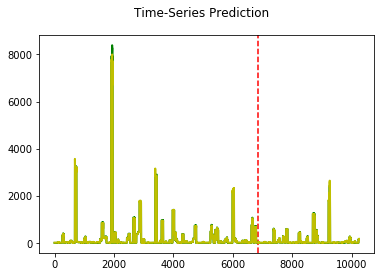

In [20]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, "g", label="real_values", linewidth=2.0)
plt.plot(data_predict, "y", label="prediction", linewidth=2.0)
plt.suptitle('Time-Series Prediction')
plt.show()

In [21]:
X = df.index.factorize()[0].reshape(-1,1)
print("X: ", X)

y = df["count"].tolist()
y = [float(i) for i in y]
print("y: ", y)

X:  [[    0]
 [    1]
 [    2]
 ...
 [10243]
 [10244]
 [10245]]
y:  [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.75, 2.5, 2.25, 2.0, 1.6666666666666667, 1.3333333333333335, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.6, 3.2, 3.8, 4.4, 5.0, 5.6, 6.2, 6.8, 7.3999999999999995, 2.0, 8.0, 7.538461538461538, 7.076923076923077, 6.615384615384615, 6.153846153846153, 5.692307692307692, 5.230769230769231, 4.769230769230769, 4.3076923076923075, 3.846153846153846, 2.0, 3.384615384615384, 2.9230769230769225, 2.4615384615384617, 2.0, 2.25, 2.5, 2.75, 3.0, 2.75, 2.5, 2.0, 2.25, 2.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0, 2.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.75, 20.5

In [22]:
def X_to_x_windows(X):
    x = []
    for i in range(len(X)):
        x.append(X[i:(i+1)])
    return np.array(x)



lstm.eval()
tensorX = Variable(torch.Tensor(X_to_x_windows(X)))

train_predict = sc.inverse_transform(lstm(tensorX).data.numpy())